## Numerisches Lösen gewöhnlicher Differentialgleichungen am Beispiel des Wurfes

*Notebook erstellt am 03.09.2022 von C. Rockstuhl, überarbeitet von Y. Augenstein*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gerader Wurf ohne Reibung
$\newcommand{\dd}{\mathrm{d}}$
$\newcommand{\qq}[1]{\quad\text{#1}}$

Wir wollen im Folgenden diskutieren, wie wir gewöhnliche Differentialgleichungen numerisch lösen können bei gegebenen Anfangsbedingungen. Auch wenn wir das betrachten für den Fall des freien Falls bzw. des Wurfes, der auch analytisch lösbar ist, wird die folgende Vorgehensweise generisch sein für alle weiteren Differentialgleichungen und insbesondere andwendbar sein für diese Fälle, die analytisch nicht mehr handhabbar sind.

Wir wissen, dass die Bewegung eines Teilchens durch die Newtonschen Bewegungsgleichungen beschrieben wird. Wir betrachten hier im einfachsten Fall einen geraden Wurf bzw. den Fall eines Objektes der Masse $m$. Dadurch ergibt sich eine ein-dimensionale Bewegungsgleichung für die Radialkoordinate. Der Einfachheit halber bezeichnen wir diese Koordinate als $y(t)$, so dass wir später eine einfache Ergänzung zum schrägen Wurf machen können. 

In diesem ein-dimensionalen Fall definieren wir die instantane Position $y(t)$, die instantane Geschwindigkeit $v(t)$ und die instantane Beschleunigung $a(t)$ des Teilchens. Diese Größen werden durch die folgenden Differentialgleichungen verbunden:

$$\begin{align} 
v(t)&=\frac{\dd y}{\dd t} \\
a(t)&=\frac{\dd v}{\dd t} \qq{.}
\end{align}$$

Die Bewegungsgleichung des von uns betrachteten Teilchen lautet allgemein: 

$$\frac{\dd^2y}{\dd t^2}=\frac{F(t)}{m} \qq{.}$$

Dies ist eine Differentialgleichung zweiter Ordnung, die wir als zwei gekoppelte Differentialgleichungen erster Ordnung schreiben können:

$$\begin{align} 
\frac{\dd y}{\dd t}&=v(t) \\
\frac{\dd v}{\dd t}&=\frac{F(t)}{m} \qq{.}
\end{align}$$

Zur numerischen Lösung dieser Gleichung diskretisieren wir den Differentialoperator auf der linken Seite und schreiben ihn als Differenzenoperator. Wir diskretisieren dafür die Zeit mit einer Schrittweite von $\Delta t$ und indizieren die diskreten Momente an denen wir Ort, Zeit und Beschleunigung des Teilchens kennen mit $n$. Wir können dann die Differentialoperatoren im einfachsten Falle diskretisieren als die Differenz des nachfolgenden und des aktuellen Wertes. Die Differentialoperatoren schreiben sich dann als   

$$\begin{align} 
\frac{\dd y}{\dd t}&\approx\frac{y_{n+1}-y_n}{\Delta t} \\
\frac{\dd v}{\dd t}&\approx\frac{v_{n+1}-v_n}{\Delta t} \qq{.}
\end{align}$$

Diese Art der Diskretisierung bezeichnet man als ein explizites Eulerverfahren. Es entspricht dem Vorwärtsdiffernzenquotienten, den wir früher bereits kennenlernten. Es ist ein explizites Verfahren, da wir nur den Ort und die Geschwindigkeit zu einem bestimmten Zeitpunkt kennen müssen, um explizit den Ort und die Geschwindigkeit des Teilchens zu einem zukünftigen Zeitpunkt berechnen zu können. Dieses Differenzenschema eingesetzt in die Differentialgleichung gibt uns dann den gesuchten Lösungsalgorithmus: 

$$\begin{align} 
y_{n+1}&=y_n+v_n\Delta t \\
v_{n+1}&=v_n+\frac{F_n}{m}\Delta t = v_n+a_n\Delta t \qq{,}
\end{align}$$

wobei wir die Beschleunigung definiert haben als $a_n=F_n/m$ mit $F_n$ der zum Zeitpunkt $t_n$ angreifenden Kraft.

Für eine Differentialgleichung zweiter Ordnung benötigen wir zwei Anfangsbedingungen zur eindeutigen Integration. Dies wären hier der Ort $y_0=y(t=0)$ und die Anfangsgeschwindigkeit $v_0=v(t=0)$ zu einem bestimmten Zeitpunkt $t=0$. Das wollen wir im Folgenden implementieren.

Als Anmerkung sei gesagt, dass diese Art die einfachste Art der Diskretisierung ist. Ein leicht komplexeres Schema wäre das implizite Euler-Verfahren. Hier würde man keinen Vorwärts-Differenzenquotienten verwenden sondern einen Rückwärts-Differenzenquotienten. Für eine gewöhnliche Differentialgleichung spielt es keine große Rolle, da sich die daraus ergebende Differenzengleichung sehr leicht umstellen lässt, um den Wert des Ortes und der Geschwindigkeit im nächsten Zeitschritt zu berechnen. Für komplexere Gleichungssysteme würde man dieses Umstellen numerisch durchführen. Der notwendige Rechenschritt, meistens die Invertierung einer Matrix, ist numerisch aufwendig. Das implizite Euler-Verfahren benötigt dann mehr Rechenschritte.

Sowohl das explizite als auch das implizite Verfahren sind in konservativen Systemen aber nicht energieerhaltend. In dem expliziten steigt die Energie an, wir haben also so etwas wie eine Verstärkung in dem System. In dem impliziten verringert sich die Energie an, wir haben also so etwas wie eine Dämpfung in dem System. Da der letztere Fall numerisch etwas angenehmer ist (keine explodierenden Lösungen), bevorzugt man häufig ein implizites Verfahren und nimmt den zusätzlichen Rechenschritt der Invertierung einer Matrix in Kauf. In jedem Fall reduzieren sich diese Fehler bei immer kleineren Schrittweiten. 

Dieses Problem, dass das Verfahren nicht Energie-erhaltend ist, können Sie auch beheben, wenn Sie den Mittelwert beider Differenzenquotienten nehmen. Ein solches Verfahren bezeichnet man als Crank-Nicholson Verfahren. Es ist explizit-implizit. Die genauen Details dieser Verfahren sind im Kontext der numerischen Physik wichtig aber nicht hier in der Mechanik. Wir konzentrierten uns daher auf die einfachste Art der Implementierung und zeigen am Schluss, wie Sie vorhandene Routinen nutzen können zur Lösung der gewöhnlichen Differentialgleichung.

Aus Programmiersicht werden wir an dieser Stelle zum ersten Mal eine sogenannte "Klasse" definieren. Dabei handelt es sich um ein allgegenwärtiges Konzept aus der [objektorientierten Programmierung](https://de.wikipedia.org/wiki/Objektorientierte_Programmierung). Eine Klasse ist eine Art Container, der sowohl Daten als auch Funktionen, welche von diesen Daten Gebrauch machen, miteinander vereint. Funktionen in Klassen nennt man "Methoden", welche sich in ihrer Definition eigentlich nicht von herkömmlichen Funktionen unterscheiden, außer dass sie _innerhalb_ einer Klasse definiert werden und als erstes Argument eine Referenz zu der Klasse, der sie angehören, bekommen. Dies ermöglicht den Methoden auf Attribute zuzugreifen, welche nur innerhalb der Klasse definiert sind.
Klassen können desweiteren ihre Methoden von anderen Klassen _erben_. Dies erweist sich als nützlich, wenn man allgemein gehaltene Klassen für bestimmte Fälle spezialiseren möchte. Wir werden einige dieser Punkte anhand der Klasse, welche wir für die weiteren Berechnungen verwenden werden, erläutern. Zur allgemeinen Referenz zu Klassen in Python verweisen wir wie gewohnt auf die Dokumentation: https://docs.python.org/3/tutorial/classes.html.

Es sei an dieser Stelle noch erwähnt, dass Klassen in erster Linie dem Zweck dienen, Code auf logische Art und Weise zu strukturieren und insgesamt modularer zu machen. Es gibt allerdings noch eine Reihe anderer Möglichkeiten, Code sinnvoll zu strukturieren. Im Fall von Klassen ist eine gute Faustregel, sich die Frage zu stellen, ob ein bestimmtes Objekt etwas _hat_ und etwas _kann_. Wenn es sich z.B. wie hier um ein abstraktes, physikalisches Teilchen handelt, dann _hat_ dieses in der Regel eine Masse, einen Ort, sowie eine Geschwindigkeit. Außerdem _kann_ es zumindest einige dieser Attribute, z.B. durch das Einwirken einer externen Kraft, verändern. Hier erscheint es also als sinnvoll all diese Dinge, welche ein Teilchen beschreiben, innerhalb einer Klasse zusammenzufassen.

In [2]:
class Particle:
    def __init__(self, mass, pos, v):
        """Initialisierung der Klasse
        Alle Klassen verfügen über eine Methode, mit der sie initialisiert werden.
        Im Fall von Python heißt diese Methode immer __init__.
        Diese Funktion wird automatisch aufgerufen, wenn wir ein neues Objekt dieser Klasse erstellen (instanziieren).
        Hier initialisieren wir die Klasse mit Werten, welche dann Klassenintern als Attribut "gespeichert" werden.
        "self" bezieht sich immer auf die jeweilige Instanz dieser Klasse und wird immer verwendet, wenn wir auf
        Attribute oder Methoden zugreifen wollen.
        """
        self.mass = mass            # Wir speichern die Masse "mass" als Attribut der Klasse.
        self.pos = np.asarray(pos)  # Die Position konvertieren wir in ein numpy-array und speichern dieses auch als Klassenattribut.
        self.v = np.asarray(v)      # Und für die Geschwindigkeit machen wir das Gleiche.

        # Nach der Initialisierung verfügt unsere Klasse also über die Attribute mass, poss, sowie v.

    def step_euler_explicit(self, f, dt):
        """Diese Methode implementiert einen einzelnen Zeitschritt im expliziten Euler-Verfahren.
        Anstatt dass diese Funktion alle Argumente wie Position, Geschwindigkeit und Masse nimmt, erhält sie lediglich
        die äußere Kraft sowie die Größe des Zeitschrittes. Die anderen Variablen werden aus den Klassenattributen
        gelesen und entsprechend aktualisiert.
        """
        self.pos = self.pos + self.v * dt
        self.v = self.v + np.asarray(f) / self.mass * dt

Nun haben wir zwar die Definition der Klasse, aber ihre Verwendung erscheint an dieser Stelle immer noch etwas abstrakt. Bevor wir also mit diesen "Teilchen" rechnen, wollen wir sie einmal instanziieren und ihre Attribute inspizieren.

In [3]:
particle_a = Particle(1, 2, 3)  # Ein Teilchen mit Masse 1, Position (1D) 2, Geschwindigkeit 3

# Um auf die einzelnen Attribute zuzugreifen, verwenden wir einen Punkt:
print(f"Teilchen A: {particle_a.mass}, {particle_a.pos}, {particle_a.v}")

particle_b = Particle(1.1, 2.2, 3.3)  # Ein Teilchen mit Masse 1.1, Position (1D) 2.2, Geschwindigkeit 3.3

print(f"Teilchen B: {particle_b.mass}, {particle_b.pos}, {particle_b.v}")

# Und wir haben tatsächlich zwei unterschiedliche Teilchen mit unterschiedlichen Eigenschaften!
print(f"Handelt es sich um das gleiche Objekt? {particle_a is particle_b}")

Teilchen A: 1, 2, 3
Teilchen B: 1.1, 2.2, 3.3
Handelt es sich um das gleiche Objekt? False


Ein kurzes Wort zur Nomenklatur: Im obigen Beispiel sind `particle_a` und `particle_b` _Instanzen_ der Klasse `Particle`. Die Klasse selbst ist statisch (sie wurde ja nur einmal definiert), unterschiedliche Instanzen dieser Klasse können aber unterschiedliche Attribute besitzen.

Sie haben sich vielleicht gewundert, wo die Einheiten im obigen Beispiel sind. Kurz gesagt gibt es keine - welche Einheiten zu den numerischen Werten gehören, wird einzig durch die Gleichungen bestimmt, welche wir verwenden und letztendlich ist es unsere Aufgabe, diese korrekt zu "interpretieren". 

Im Folgenden schreiben wir einen Code, der die oben beschriebene Differenzengleichung implementiert.

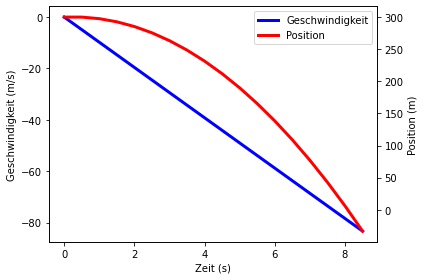

Die Flugzeit bis zum Boden beträgt: 8.5
Die maximale Geschwindigkeit beträgt: -83.3


In [4]:
g = 9.8      # Erdbeschleunigung
mass = 0.01  # Masse des Teilchens
y0 = 300     # Anfangsposition
v0 = 0       # Anfangsgeschwindigkeit
dt = 0.5     # Schrittweite in der Zeit

p = Particle(mass, y0, v0)  # Instanizerung des Teilchens.

# Da wir die Anzahl an aufgezeichneten Koordinaten noch nicht kennen (wir wissen nicht, 
# wie lange der Wurf dauert), definieren wir unsere Ergebnisse als eine Liste, an die wir
# die aktuellen Ergebnisse mit dem `append`-Befehl immer wieder anfügen.
# Beachten Sie, dass wir diese Listen nicht für die Berechnung selbst, sondern nur für
# die spätere Auswertung der Daten (hier Plotting) benötigen.
y = [y0]
v = [v0]
t = [0.0]

while p.pos > 0:
    fy = -g * p.mass
    p.step_euler_explicit(fy, dt)
    y.append(p.pos)
    v.append(p.v)
    t.append(t[-1] + dt)

fig, ax = plt.subplots()
lns1 = plt.plot(t, v, color="blue", ls="-", lw=3, label="Geschwindigkeit")
ax.set_xlabel("Zeit (s)")
ax.set_ylabel("Geschwindigkeit (m/s)")
ax2 = ax.twinx()
lns2 = ax2.plot(t, y, color="red", ls="-", lw=3, label="Position")
ax2.set_ylabel("Position (m)")
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.tight_layout()
plt.show()

print(f"Die Flugzeit bis zum Boden beträgt: {round(t[-1],5)}")
print(f"Die maximale Geschwindigkeit beträgt: {round(v[-1],5)}")


Beachten Sie bitte im obigen Beispiel wie die Flugzeit und die maximale Geschwindigkeit sich als Funktion der numerischen Diskretisierung ändern. Diese Werte können Sie gut vergleichen zu den theoretischen Werten $T=\sqrt{2h}{g}$ und $v_\mathrm{max}=-\sqrt{2gh}$.   

### Gerader Wurf mit Reibung

Die Form der geschwindigkeitsabhängigen Widerstandskraft für eine **laminare Strömung**, bei der also keine Verwirbelung auftritt, ist gegeben durch

$$F_d=\kappa v \qq{.}$$

Hierbei ist $\kappa$ ein Parameter, der von den Eigenschaften des Mediums und der Form des Objekts abhängt. Dies ist die sogenannte Stokessche Reibung.
Da $F_d$ mit steigendem $v$ zunimmt, gibt es eine Grenzgeschwindigkeit, bei der $F_d=-F_g=mg$ ist und die Beschleunigung verschwindet: 

$$\kappa v_t=mg \Rightarrow v_t=\frac{mg}{\kappa} \qq{.}$$ 

In Bezug auf die Endgeschwindigkeit $v_t$ kann die Kraft $F_d$ umgeschrieben werden als 

$$F_d=mg\left(\frac{v}{v_t}\right) \qq{.}$$ 

Die Gesamtkraft auf ein in die negative $y$-Richtung fallendes Teilchen ist gegeben durch 

$$F=-mg-mg\frac{v}{v_t} \qq{.}$$

Die Form der geschwindigkeitsabhängigen Widerstandskraft für eine **turbulente Strömung**, bei der also eine Verwirbelung auftritt, ist gegeben durch 

$$F_d=q v^2 \frac{v}{|v|} \qq{,}$$ 

wobei $q$ ein Parameter ist, der von den Eigenschaften des Mediums und der Form des Objekts abhängt. Dies ist die sogenannte Newtonsche Reibung, die im speziellen auch für den Fall eines Teilchens in Luft gilt.
Da $F_d$ mit steigendem $v$ zunimmt, gibt es eine Grenzgeschwindigkeit, bei der $F_d=-F_g=mg$ ist und die Beschleunigung verschwindet: 

$$q v_t^2 \frac{v_t}{|v_t|}=mg \Rightarrow v_t=\sqrt{\frac{mg}{q}} \qq{.}$$ 

In Bezug auf die Endgeschwindigkeit $v_t$ kann die Kraft $F_d$ umgeschrieben werden als 

$$F_d=mg\left(\frac{v^2}{v_t^2}\frac{v}{|v|}\right) \qq{.}$$ 

Die Gesamtkraft auf ein in negative $y$-Richtung fallendes Teilchen ist also gegeben durch 

$$F=-mg-q v^2 \frac{v}{|v|}=-mg-q v |v| \qq{.}$$

Wir wollen im Folgenden die Geschwindigkeit berechnen, mit der ein Kieselstein der Masse $m=10^{-2}$ kg den Boden erreicht, wenn er aus der Ruhelage mit $y_0=300$ m fallen gelassen wird. Wir nehmen an, dass die Widerstandskraft proportional zu $v^2$ ist und die Endgeschwindigkeit $v_t=30$ m/s beträgt.

Das Programm selbst sieht ziemlich genau so aus wie das vorherige, aber wir müssen die Widerstandskraft einführen.

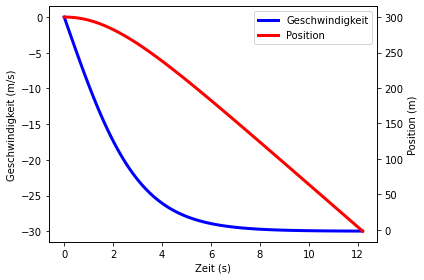

In [5]:
g = 9.8
mass = 0.01
y0 = 300
v0 = 0
vt = 30               # Endgeschwindigkeit
q = g * mass / vt**2  # Reibungskoeffizient ausgedrückt über die Endgeschwindigkeit
dt = 0.1

p = Particle(mass, y0, v0)

y = [y0]
v = [v0]
t = [0.0]

while p.pos > 0:
    fy = -g * p.mass - q * p.v * abs(p.v)
    p.step_euler_explicit(fy, dt)
    y.append(p.pos)
    v.append(p.v)
    t.append(t[-1] + dt)

fig, ax = plt.subplots()
lns1 = ax.plot(t, v, color="blue", ls="-", lw=3, label="Geschwindigkeit")
ax.set_xlabel("Zeit (s)")
ax.set_ylabel("Geschwindigkeit (m/s)")
ax2 = ax.twinx()
lns2 = ax2.plot(t, y, color="red", ls="-", lw=3, label="Position")
ax2.set_ylabel("Position (m)")
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="best")
plt.tight_layout()
plt.show()

### Schräger Wurf mit Reibung

Zur Beschreibung des schrägen Wurfes müssen wir nichts weiter machen als die Differentialgleichungen für die zwei Komponenten separat aufschreiben und lösen. Unter Berücksichtigung der Reibung, die zu einer Kraft in entgegengesetzter Richtung zur Geschwindigkeit führt, können wir diese beiden Gleichungen in Komponentenschreibweise auschreiben als 

$$\begin{align} 
m\frac{\dd v_x}{\dd t}&=-F_{d,x} \\ 
m\frac{\dd v_y}{\dd t}&=-mg-F_{d,y} \qq{.}
\end{align}$$

Wie betrachten hier wieder Newtonsche Reibung in der Luft, also $F_d=qv|v|$, $v_x=v\cos{\theta}$ und $v_y=v\sin{\theta}$. Wir finden, dass die folgenden Gleichungen gelten:

$$\begin{align} 
\frac{\dd v_x}{\dd t}&=-\frac{q}{m}v_x |v| \\ 
\frac{\dd v_y}{\dd t}&=-g-\frac{q}{m}v_y |v| \qq{,}
\end{align}$$

mit $v^2=v_x^2+v_y^2$. Daher können wir die vertikale Bewegung des Objekts nicht ohne Bezug auf die horizontale Komponente berechnen. Es sei bemerkt, dass Gleichungen für die Ortskoordinaten unverändert bleiben und einfach konkret für die einzelnen Koordinaten ausgeschrieben werden:

$$\begin{align} 
\frac{\dd x}{\dd t}&=v_x(t)\\
\frac{\dd y}{\dd t}&=v_y(t)\qq{.}
\end{align}$$


Im Folgenden haben wir das Programm gleich so geschrieben, dass wir den Abschusswinkel varrieren und die Trajektorie des Teilchens verfolgen.

Beachten Sie dass wir, obwohl unsere Rechnung nun zweidimensional ist, unsere alte Klasse `Particle` wiederverwenden können, da wir in den Attributen natürlich auch einfach mehrdimensionale Vektoren (oder präziser: numpy arrays) speichern können. Hier profitieren wir davon, dass wir unsere Klasse recht allgemein gehalten und nicht für den eindimensionalen Fall "überspezialisiert" haben.

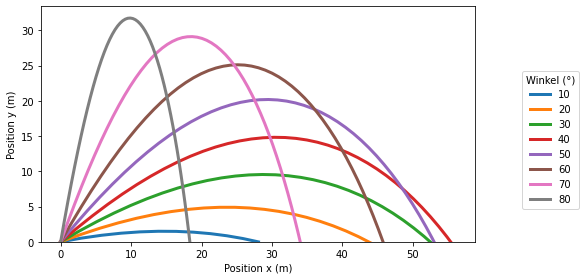

In [6]:
g = 9.8
mass = 1
v0 = 30
x0 = 0
y0 = 0
vt = 30               # Endgeschwindigkeit
q = g * mass / vt**2  # Reibungskoeffizient ausgedrückt über die Endgeschwindigkeit
dt = 0.1

fig, ax = plt.subplots(figsize=(9, 4))

# Wir variieren den Abschusswinkel und lösen die DGL für jeden dieser Winkel
for angle in range(10, 90, 10):
    # Position und Geschwindigkeit bestehen nun aus einem Koordinatenpaar
    pos = [(x0, y0)]  
    v = [np.cos(np.deg2rad(angle)) * v0, np.sin(np.deg2rad(angle)) * v0]
    t = 0.0

    p = Particle(mass, pos[0], v)

    while p.pos[1] >= 0:  # p.pos = [x, y] --> p.pos[1] ist die y-Koordinate
        f_friction = -q * p.v * np.linalg.norm(p.v)  # Newton-Reibung vektoriell (zwei Komponenten in v)
        f_grav = np.array([0, -g * p.mass])                   # Vektorielle Gravitationskraft, welche nur in -y wirkt
        f = f_friction + f_grav
        p.step_euler_explicit(f, dt)

        pos.append(p.pos)

    # Wir plotten eine Trajektorie für jeden Winkel (ein Mal pro Schleifendurchlauf)
    ax.plot(*np.asarray(pos).T, lw=3, label=angle)

ax.set_ylim(0, None)
ax.set_aspect("equal")
ax.set_xlabel("Position x (m)")
ax.set_ylabel("Position y (m)")
fig.legend(title="Winkel (°)", loc="right")
plt.tight_layout()
plt.show()

### Effiziente Implementierung mit bestehenden Lösern für gewöhnliche Differentialgleichungen 


Wir werden das Problem nun einmal mit einer integrierten Routine von SciPy anstatt mit unserer selbstgeschriebenen expliziten Euler-Methode lösen. Es gibt unzählige unterschiedliche Verfahren zum Lösen von Differentialgleichungen und wahrscheinlich noch mehr numerische Routinen, welche diese Verfahren implementieren. Sollten Sie also außerhalb einer Lernumgebung mit einem solchen Problem konfrontiert werden, sollten Sie praktisch immer auf eine dieser Routinen zurückgreifen, da diese in der Regel von sehr vielen Menschen getestet und oftmals hochoptimiert sind.

Zum Lösen unserer Differentialgleichung werden wir hier `solve_ivp` (Solve Initial Value Problem) verwenden. Diese SciPy Routine bietet eine standardisierte Schnittstelle für eine Reihe von unterschiedlichen Algorithmen zum Lösen von DGLs. Ihr Funktionsumfang ist recht groß und wir werden hier nur Teile davon verwenden. Um einen besseren Überblick zu erhalten, werfen Sie bitte einen Blick in die Dokumentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html.

Zur Definition des DGL-Problems erwarten die meisten Routinen (nicht nur in SciPy) eine ähnliche Struktur. Und zwar definiert man eine zeitabhängige Funktion, welche eine Reihe an Variablen erhält und als Ausgabe die Zeitableitung dieser Variablen zurückgibt. Letztendlich wird in dieser Funktion also die ganze Differentialgleichung komponentenweise definiert wie sie auf dem Papier steht.
Diese Informationen werden dann von den unterschiedlichen Methoden zum Lösen von DGLs verwendet, um die Zeitintegration (meist mit adaptiver Schrittweite) durchzuführen. Die DGL selbst und die Methode zur Zeitintegration werden auf diese Art und Weise also sauber voneinander getrennt.

Neben diesem "Kern" (also der Spezifizierung der DGL sowie des Lösungsalgorithmus) müssen wir ein paar weitere Dinge angeben, um unsere DGL eindeutig lösen zu können - und zwar die Anfangsbedingungen sowie das Zeitintervall, über welches integriert werden soll. Hierbei ist der Zeitpunkt, an dem die Integration gestoppt werden soll, oftmals nicht bekannt. Hierfür verwendet man dann sogenannte Ereignisse. Dabei handelt es sich um Funktionen, welche in jedem Zeitintervall aufgerufen werden und dem Lösungsalgorithmus mitteilen, ob die Zeitintegration gestoppt werden soll. In unserem Fall wollen wir die Integration stoppen, wenn das Teilchen nach dem Wurf wieder den Boden berührt, wenn also die y-Komponente der Position Null wird. Damit die Zeitintegration nicht vorzeitig gestoppt wird, wählen wir als obere Integrationsgrenze einfach einen ausreichend großes Wert.

In [7]:
from scipy.integrate import solve_ivp


def trajectory(t, z, q, m, g):
    """Diese Funktion definiert unsere Bewegungs-DGL.
    Sie erhält als Input die Zeit t (auch wenn diese nirgendwo explizit verwendet wird!),
    den Vektor der einzelnen Komponenten der DGL z, sowie alle weiteren Parameter, welche
    für die Gleichung benötigt werden. In unserem Falle sind das der Reibungskoeffizient q,
    die Masse m, sowie die Erdbeschleunigung g.
    """

    # Zunächst entpacken wir den Komponentenvektor z in die uns bekannten Variablen.
    # Muss man nicht tun, macht die ganze Geschichte aber deutlich lesbarer.
    x, y, vx, vy = z
    
    # Den Geschwindigkeitsbetrag berechnen wir direkt, da wir ihn mehrmals benötigen.
    vabs = np.sqrt(vx**2 + vy**2)

    # Nun schreiben wir die einzelnen Terme unserer DGL auf.
    dx = vx
    dy = vy
    d_vx =    - q / m * vx * vabs
    d_vy = -g - q / m * vy * vabs

    # Und geben diese aus.
    # WICHTIG: Die einzelnen Komponenten müssen hier in der gleichen Reihenfolge
    # wie in der Eingabe stehen, sonst werden Terme miteinander vertauscht!
    # Auch die Anzahl an Komponenten darf sich in Bezug auf die Eingabe nicht verändern.
    return dx, dy, d_vx, d_vy


def hit_ground(t, z, q, m, g):
    """Diese Funktion definiert unsere Abbruchbedingung.
    Sie ist zwar extrem einfach, bedarf aber einer kleinen Erläuterung.
    Die Routine solve_ivp prüft in jeder Iteration, ob der Wert dieses Ereignisses Null ist.
    Ob dann etwas geschehen soll (z.B. Abbruch der Iteration), wird an anderer Stelle definiert.

    Da der Vektor z aus den Komponenten [x, y, vx, vy] besteht, ist z[1] also die
    y-Position unseres Teilchens. Wenn diese Null wird, ist unser Teilchen wieder
    am Boden angelangt.
    Wir können die Integration aber auch ganz einfach z.B. am Hochpunkt der Trajektorie
    abbrechen, in dem wir an dieser Stelle die y-Komponente der Geschwindigkeit, also
    z[3] zurückgeben.
    """
    return z[1]

An dieser Stelle müssen wir gezwungenermaßen eine etwas esoterische Eigenschaft von Python kennenlernen.
Nicht nur Klassen, sondern auch Funktionen, können eigene Attribute haben.
Das bedeutet, dass man eine Funktion mit beliebigen weiteren Variablen versehen kann und diese dann auch nur unter dem entsprechenden Funktionsnamen mit der bereits bekannten Punkt-Schreibweise verfügbar sind. Diese Eigenschaft wird hauptsächlich dazu verwendet, um Funktionen mit "Metadaten" zu versehen.
Weitere Informationen dazu finden Sie hier: https://docs.python.org/3/reference/datamodel.html#:~:text=Function%20objects%20also,in%20the%20future.

Die Routine `solve_ivp` macht von diesen Attributen Gebrauch um festzustellen, ob das Ereignis nur stattfinden soll, wenn man aus einer bestimmten Richtung kommt (definiert durch einen Vorzeichenwechsel), und ob dieses Ereignis die Integration terminieren soll. Von beiden Dingen machen wir hier Gebrauch, denn wir wollen das Ereignis zum Einen nur auslösen, wenn wir die Null aus positiver y-Richtung überqueren (sonst würden wir direkt beim Wurf terminieren) und zum Anderen soll dieses Ereignis die Integration stoppen.

In [8]:
hit_ground.direction = -1  # Vorzeichenwechsel: [-1: + nach -, 0: beide Richtungen, +1: - nach +]
hit_ground.terminal = True

Nun haben wir alles definiert was wir benötigen und müssen nur noch passende Anfangsbedingungen wählen und `solve_ivp` aufrufen um unser Problem zu lösen. Wir werden uns hier veranschaulichen, wie die Trajektorie des Teilchens sich mit unterschiedlichen Reibungskoeffizienten verändert.

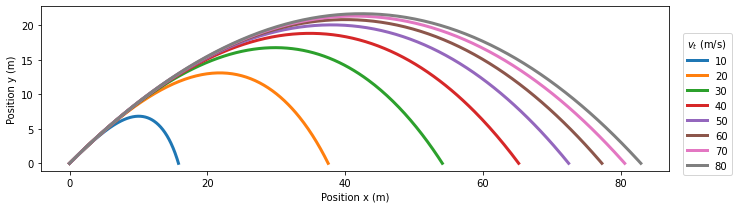

In [9]:
g = 9.8
m = 1
v0 = 30
x0 = 0
y0 = 0
angle = 45  # Diesmal wählen wir einen festen Winkel
ts = (0, 100)  # t0 und t_end, die Zeitschritte über die wir integrieren.
vx0 = np.cos(np.deg2rad(angle)) * v0
vy0 = np.sin(np.deg2rad(angle)) * v0

fig, ax = plt.subplots(figsize=(11, 3))

# Die Schleife lassen wir über unterschiedliche Endgeschwindigkeiten laufen,
# aus der wir dann den Reibungskoeffizienten berechnen.
for vt in range(10, 90, 10):
    q = g * mass / vt**2

    # Nun folgt der Aufruf von solve_ivp.
    # Wir haben die unterschiedlichen Argumente bereits besprochen - was noch einer
    # Erläuterung bedarf ist die Option `dense_output`.
    # Einfache DGL wie unsere hier müssen von den meisten Methoden nur an wenigen
    # Punkten ausgewertet werden, um eine ausreichend hohe Genauigkeit zu erreichen.
    # Wenn wir das Ergebnis plotten wollen, brauchen wir allerdings recht viele Punkte,
    # um eine glatte Linie zu bekommen.
    # Die Option `dense_output` konstruiert aus den wenigen Punkten, an denen die DGL
    # tatsächlich evaluiert wurde, eine kontinuierliche Funktion, welche wir dann an
    # beliebig vielen Punkten innerhalb des Integrationsintervalls auswerten können.
    # Außerhalb des Intervalls ist diese jedoch nicht gültig!
    res = solve_ivp(
        trajectory,
        ts,
        (x0, y0, vx0, vy0),
        args=(q, m, g),
        events=hit_ground,
        dense_output=True,
    )

    # `res` ist das Ausgabeobjekt von `solve_ivp` welches viele Informationen zum Status
    # des Algorithmus enthält. Sie können sich auch einmal das ganze Objekt mit print()
    # ausgeben lassen. Wir werden hier die Felder `t`` und `sol`` verwenden. `t` enthält alle ausgewerteten
    # Zeitschritte und `sol` enthält die Interpolationsfunktion, welche wir innerhalb dieses Intervalls
    # auswerten wollen.

    t = np.linspace(res.t[0], res.t[-1], 200)  # 200 Zeitpunkte zwischen Wurf und Landung
    x, y, vx, vy = res.sol(t)
    ax.plot(x, y, lw=3, label=vt)

ax.set_aspect("equal")
ax.set_xlabel("Position x (m)")
ax.set_ylabel("Position y (m)")
fig.legend(title=r"$v_t$ (m/s)", loc="right")
plt.tight_layout()
plt.show()